# Preprocess
The script `preprocess.py` shapes the data required for training in the following order:
- Reads csv files
- Creats dummy dataframes (aka model-matrix)
- Drops samples with missing values
- Joins the two data set and creates a feature-set
- Provides a function to randomly split the data based on `random_seed` value

In [1]:
# !pip3 install pandas
# !pip3 install sklearn
# !pip3 install matplotlib

In [2]:
from preprocess import *


Complete Cases (i.e. without any missing values): 
(647, 418)


## Glimpse of given datasets
There are two datasets:
1. heroes_info: contains basic information about the hero (e.g. weight, height)
2. heroes_pwer: contains information regarding power of the heroes

In [3]:
heros_info.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,isHuman
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,1
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,0


In [4]:
heros_power.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Binary Classification Model Training and Evaluation
The script `main.py` sources three model training subroutines:
1. Multi Layer Perceptron (MLP) with logistic activation
2. Multi Layer Perceptron (MLP) with tanh activation
3. Logistic Regression (LR)

These three binary classifiers were trained 5 times with randomly chosen values of seed.

In [5]:
# random seeds
seeds = [1,3,35,279,20]

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from main import *

Trainig size: 
(485, 413)
Test size: 
(162, 413)


Training MLP with seed:  1
Confusion Matrix:  
 [[93 22]
 [24 23]] 

Trainig size: 
(485, 413)
Test size: 
(162, 413)


Training MLP with seed:  3
Confusion Matrix:  
 [[93 20]
 [28 21]] 

Trainig size: 
(485, 413)
Test size: 
(162, 413)


Training MLP with seed:  35
Confusion Matrix:  
 [[92 17]
 [30 23]] 

Trainig size: 
(485, 413)
Test size: 
(162, 413)


Training MLP with seed:  279
Confusion Matrix:  
 [[94 16]
 [25 27]] 

Trainig size: 
(485, 413)
Test size: 
(162, 413)


Training MLP with seed:  20
Confusion Matrix:  
 [[101  19]
 [ 16  26]] 

Trainig size: 
(485, 413)
Test size: 
(162, 413)


Training MLP with seed:  1
Confusion Matrix:  
 [[93 22]
 [19 28]] 

Trainig size: 
(485, 413)
Test size: 
(162, 413)


Training MLP with seed:  3
Confusion Matrix:  
 [[91 22]
 [26 23]] 

Trainig size: 
(485, 413)
Test size: 
(162, 413)


Training MLP with seed:  35
Confusion Matrix:  
 [[92 17]
 [29 24]] 

Trainig size: 
(485, 413)
Test 

## Evaulation
The follwing sections show evluation of the model and comparison of each case.

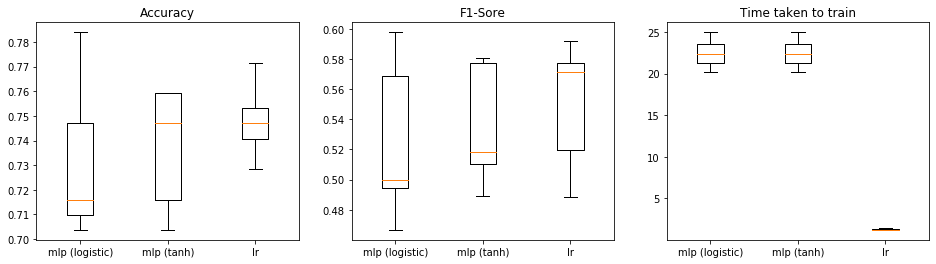

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# accuracy plot
axs[0].boxplot([accs_mlp, accs_mlp2, accs_lr])
axs[0].set_title('Accuracy')
# plt.show()

# F1-score plot
axs[1].boxplot([fs_mlp, fs_mlp2, fs_lr])
axs[1].set_title('F1-Sore')

# Duration plot
axs[2].boxplot([t_mlp, t_mlp, t_lr])
axs[2].set_title('Time taken to train')

# labels
plt.setp(
  axs, 
  xticks=[y + 1 for y in range(len([accs_mlp, accs_mlp2, accs_lr]))],
  xticklabels=['mlp (logistic)', 'mlp (tanh)', 'lr'])
plt.show()

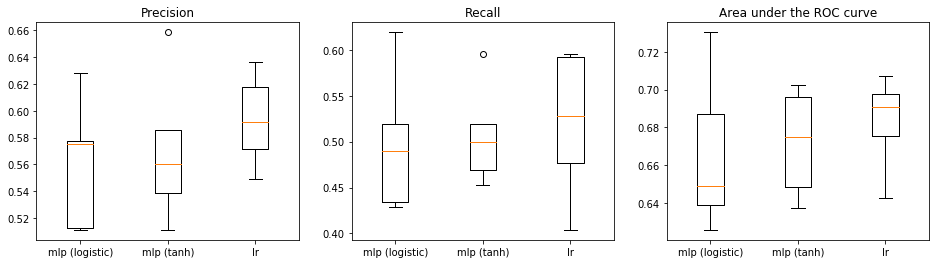

In [8]:
# let us see some other evaluation metrics
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

axs[0].boxplot([prec_mlp, prec_mlp2, prec_lr])
axs[0].set_title('Precision')

axs[1].boxplot([rec_mlp, rec_mlp2, rec_lr])
axs[1].set_title('Recall')

axs[2].boxplot([auc_mlp, auc_mlp2, auc_lr])
axs[2].set_title('Area under the ROC curve')

# labels
plt.setp(
  axs, 
  xticks=[y + 1 for y in range(len([accs_mlp, accs_mlp2, accs_lr]))],
  xticklabels=['mlp (logistic)', 'mlp (tanh)', 'lr'])
plt.show()